### Different methods to create list of data

In [1]:
x = list(range(144))
type(x)

# pro: very clean
# con: you have to know/write functions 

list

In [2]:
import numpy as np
x2 = np.linspace(0, 143, 144, dtype=np.int32)

# Numpy array
# pro: super fast
# pro: allows for many advanced functions (LinAlg, etc.)

In [ ]:
# Collector pattern
x4 = []
for i in range(144):
    x.append(i)
    
# pro: easy to read
# pro: easy to modify (even for complicated stuff)
# con: more code

In [3]:
# list comprehension
x3 = [i for i in range(144)]

# pro: short
# con: can become harder to read

### Load flight data

In [4]:
import seaborn as sns

In [6]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [46]:
# extract passenger numbers as a list
y = np.log(df['passengers']).diff().fillna(0).to_list()
# y = list(df['passengers']) would also work
len(y)

144

### Train-Test-Split

In [47]:
# train test split is a little bit different for time-dependent data
xtrain = x[:132] #also possible x[:-12]
xtest = x[132:] #  x[-12:]
ytrain = y[:132]
ytest = y[132:]

In [48]:
# all Junes
x[5::12]

[5, 17, 29, 41, 53, 65, 77, 89, 101, 113, 125, 137]

## Naive Forecasting methods
**Baseline models**
* simple and easy to implement
* any serious model should beat them

### 1. Forecast the last value seen

In [49]:
ypred_last = [ytrain[-1]]*len(xtest)

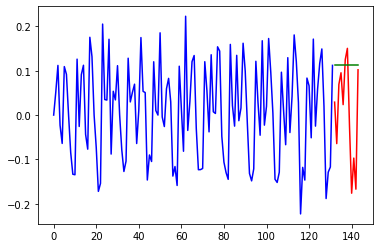

In [50]:
from matplotlib import pyplot as plt
plt.plot(xtrain, ytrain, 'b-')
plt.plot(xtest, ytest, 'r-')
plt.plot(xtest, ypred_last, 'g-')

### 2. Forecast the mean

In [51]:
mean = sum(ytrain) / len(ytrain)
ypred_mean = [mean]*len(xtest)

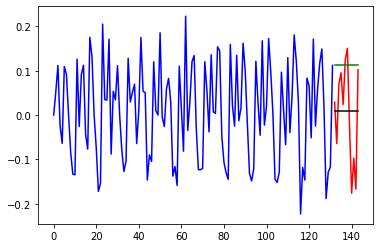

In [52]:
from matplotlib import pyplot as plt
plt.plot(xtrain, ytrain, 'b-')
plt.plot(xtest, ytest, 'r-')
plt.plot(xtest, ypred_last, 'g-')
plt.plot(xtest, ypred_mean, 'k-')

### 3. Forecast the seasonal mean

In [53]:
ypred_sm = []
for i, j in enumerate(xtest): # <-- panda-less index
    month = i % 12 # modulo - good for everything cyclic
    month_mean = sum(ytrain[month::12]) / len(ytrain[month::12])
    ypred_sm.append(month_mean)
ypred_sm

[0.022499829136215187,
 -0.007223051004675473,
 0.1467625239163248,
 -0.03181161076769728,
 0.00625209280167431,
 0.13284475478547753,
 0.11067820318259751,
 0.003213427113678174,
 -0.13076282051785978,
 -0.13090816678219375,
 -0.130594141813084,
 0.1259024322960378]

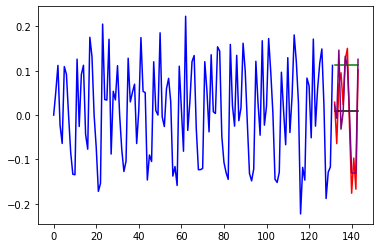

In [54]:
from matplotlib import pyplot as plt
plt.plot(xtrain, ytrain, 'b-')
plt.plot(xtest, ytest, 'r-')
plt.plot(xtest, ypred_last, 'g-')
plt.plot(xtest, ypred_mean, 'k-')
plt.plot(xtest, ypred_sm, 'purple')

[(0, 132),
 (1, 133),
 (2, 134),
 (3, 135),
 (4, 136),
 (5, 137),
 (6, 138),
 (7, 139),
 (8, 140),
 (9, 141),
 (10, 142),
 (11, 143)]